Without using inbuilt functions:
1. Implement a perceptron from scratch for binary classification. Using the perceptron learning rule for training, classify linearly separable data (of your choice) and plot the decision boundary for the perceptron after training.
2. Implement XOR using network of perceptrons. Visualize the results.

PERCEPTRON:
1. Invented by Frank Rosenblatt in 1957.
2. building block of ANN(Artificial Neural Network)
3. It is a single layer feedforward network
4. It is a supervised learning algorithm
5. It is used for classification and regression problems
6. It is a binary classifier, i.e., it can only classify data into two classes.
7. It is a linear classifier, i.e., it can only learn linear decision boundaries.
8. It is a simple and fast algorithm, but it is not very accurate.
9. It is used in many applications such as image classification, speech recognition, and natural language processing


Model:
1. The model is a simple perceptron with one input layer, one hidden layer, and one output layer.
2. input is not binary it is real.
3. The model is trained using the perceptron learning algorithm.
4. The model is used for binary classification problems.


Advantages:
* single layer perceptron can learn only linearly seprable patterns.
* It is simple and fast to train.
* It is a good starting point for more complex models.(Foundational Algorithm)
* Low coputational power.
* perceptron can implement logic gates like AND, OR.

Disadvantages:

* Cannot Handle Non-Linearly Separable Data:
* Sensitive to Learning Rate. (A poorly chosen 
η can cause slow convergence or overshooting.)

* Limited to Binary Classification:
* Not suitable for multi-class classification problems.
* No Guarantee of Optimal Hyperplane:



 




PSEUDOCODE:
1. Initialize Parameters:
   - Weights w = [w1, w2, ..., wd], random small values or zeros.
   - Bias b = 0
   - Learning rate η  (e.g., 0.01).

2. Repeat for N epochs or until convergence:
   - For each sample (x, y_true) in training data:
      1. Compute z = w · x + b
      2. Compute y_pred:   (activation function == step function )
         - If z > 0: y_pred = 1
         - Else: y_pred = 0
      3. If y_pred != y_true:
         - Update weights: w = w + η * (y_true - y_pred) * x
         - Update bias: b = b + η * (y_true - y_pred)

3. After training, use the learned weights and bias for prediction.

4. Decision Boundary:
   - Use the equation w1 * x1 + w2 * x2 + b = 0 to visualize the boundary.


In [22]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt

In [23]:
class perceptron:
    def __init__(self, learning_rate, n_iters):
        self.weights = None
        self.bias = None
        self.learning_rate = learning_rate
        self.n_iters = n_iters

    def activation_function(self, input):
        return np.where(input > 0, 1, 0)

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)

        n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features) * 1e-4
        self.bias = 0

        for epoch in range(self.n_iters):
            print(f"Epoch {epoch + 1}:")
            for i in range(n_samples):
                
                linear_output = np.dot(X[i], self.weights) + self.bias
                y_predicted = self.activation_function(linear_output)

                update = self.learning_rate * (y[i] - y_predicted)
                # self.weights_old = self.weights
                self.weights = self.weights +  update * X[i]
                self.bias += update
                print(self.weights)
                
                # if self.weights_old == self.weights:
                #      break
            
             
            
            print(f"  Weights: {self.weights}")
            print(f"  Bias: {self.bias}\n")

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_function(linear_output)





In [24]:
# AND operation dataset

data = {"x1": [0, 0, 1, 1], "x2": [0, 1, 0, 1], "y": [0, 0, 0, 1]}
AND = pd.DataFrame(data)

X = AND.drop("y", axis=1)
y = AND["y"]

X = X.to_numpy()
y = y.to_numpy()

model = perceptron(learning_rate=0.01, n_iters=10)
model.fit(X, y)

predictions = model.predict(X)
print("Predictions:", predictions)
print("True Labels:", y)

Epoch 1:
[ 7.35654915e-05 -2.26242205e-05]
[ 7.35654915e-05 -2.26242205e-05]
[-9.92643451e-03 -2.26242205e-05]
[7.35654915e-05 9.97737578e-03]
  Weights: [7.35654915e-05 9.97737578e-03]
  Bias: 0.0

Epoch 2:
[7.35654915e-05 9.97737578e-03]
[ 7.35654915e-05 -2.26242205e-05]
[ 7.35654915e-05 -2.26242205e-05]
[0.01007357 0.00997738]
  Weights: [0.01007357 0.00997738]
  Bias: 0.0

Epoch 3:
[0.01007357 0.00997738]
[ 1.00735655e-02 -2.26242205e-05]
[ 7.35654915e-05 -2.26242205e-05]
[0.01007357 0.00997738]
  Weights: [0.01007357 0.00997738]
  Bias: -0.01

Epoch 4:
[0.01007357 0.00997738]
[0.01007357 0.00997738]
[7.35654915e-05 9.97737578e-03]
[0.01007357 0.01997738]
  Weights: [0.01007357 0.01997738]
  Bias: -0.01

Epoch 5:
[0.01007357 0.01997738]
[0.01007357 0.00997738]
[0.01007357 0.00997738]
[0.01007357 0.00997738]
  Weights: [0.01007357 0.00997738]
  Bias: -0.02

Epoch 6:
[0.01007357 0.00997738]
[0.01007357 0.00997738]
[0.01007357 0.00997738]
[0.01007357 0.00997738]
  Weights: [0.01007357

In [25]:
# Plot the decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict on the grid
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.Paired)
    plt.title("Decision Boundary ")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.grid()
    plt.show()




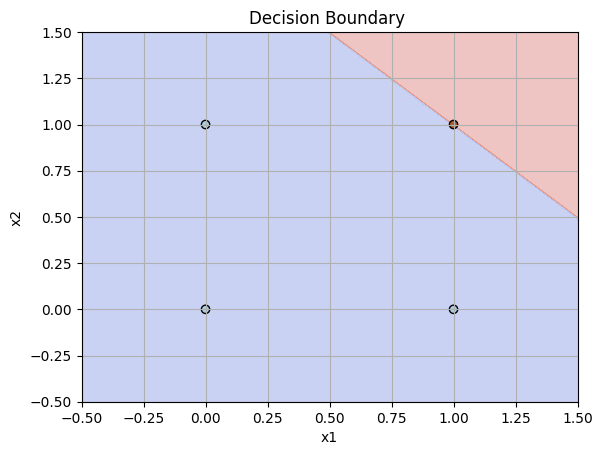

In [26]:
# Plotting
plot_decision_boundary(X, y, model)

In [27]:
#or operation dataset
data = {"x1": [0, 0, 1, 1], "x2": [0, 1, 0, 1], "y": [0, 1, 1, 1]}
OR = pd.DataFrame(data)

X = OR.drop("y", axis=1)
y = OR["y"]

X = X.to_numpy()
y = y.to_numpy()

model = perceptron(learning_rate=0.01, n_iters=10)
model.fit(X, y)

predictions = model.predict(X)
print("Predictions:", predictions)
print("True Labels:", y)

Epoch 1:
[2.42998925e-05 5.65541226e-05]
[2.42998925e-05 5.65541226e-05]
[2.42998925e-05 5.65541226e-05]
[2.42998925e-05 5.65541226e-05]
  Weights: [2.42998925e-05 5.65541226e-05]
  Bias: 0.0

Epoch 2:
[2.42998925e-05 5.65541226e-05]
[2.42998925e-05 5.65541226e-05]
[2.42998925e-05 5.65541226e-05]
[2.42998925e-05 5.65541226e-05]
  Weights: [2.42998925e-05 5.65541226e-05]
  Bias: 0.0

Epoch 3:
[2.42998925e-05 5.65541226e-05]
[2.42998925e-05 5.65541226e-05]
[2.42998925e-05 5.65541226e-05]
[2.42998925e-05 5.65541226e-05]
  Weights: [2.42998925e-05 5.65541226e-05]
  Bias: 0.0

Epoch 4:
[2.42998925e-05 5.65541226e-05]
[2.42998925e-05 5.65541226e-05]
[2.42998925e-05 5.65541226e-05]
[2.42998925e-05 5.65541226e-05]
  Weights: [2.42998925e-05 5.65541226e-05]
  Bias: 0.0

Epoch 5:
[2.42998925e-05 5.65541226e-05]
[2.42998925e-05 5.65541226e-05]
[2.42998925e-05 5.65541226e-05]
[2.42998925e-05 5.65541226e-05]
  Weights: [2.42998925e-05 5.65541226e-05]
  Bias: 0.0

Epoch 6:
[2.42998925e-05 5.65541226

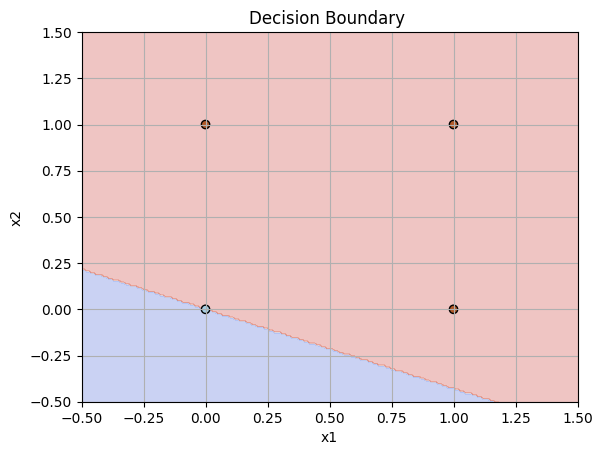

In [28]:
# Plotting
plot_decision_boundary(X, y, model)

In [29]:
#xor operation dataset
data = {"x1": [0, 0, 1, 1], "x2": [0, 1, 0, 1], "y": [0, 1, 1, 0]}
XOR = pd.DataFrame(data)


X = XOR.drop("y", axis=1)
y = XOR["y"]


X = X.to_numpy()
y = y.to_numpy()


model = perceptron(learning_rate=0.01, n_iters=10)
model.fit(X, y)


predictions = model.predict(X)
print("Predictions:", predictions)
print("True Labels:", y)

Epoch 1:
[6.99681586e-06 9.20691752e-05]
[6.99681586e-06 9.20691752e-05]
[6.99681586e-06 9.20691752e-05]
[-0.009993   -0.00990793]
  Weights: [-0.009993   -0.00990793]
  Bias: -0.01

Epoch 2:
[-0.009993   -0.00990793]
[-9.99300318e-03  9.20691752e-05]
[6.99681586e-06 9.20691752e-05]
[-0.009993   -0.00990793]
  Weights: [-0.009993   -0.00990793]
  Bias: 0.0

Epoch 3:
[-0.009993   -0.00990793]
[-9.99300318e-03  9.20691752e-05]
[-9.99300318e-03  9.20691752e-05]
[-0.019993   -0.00990793]
  Weights: [-0.019993   -0.00990793]
  Bias: 0.0

Epoch 4:
[-0.019993   -0.00990793]
[-1.99930032e-02  9.20691752e-05]
[-9.99300318e-03  9.20691752e-05]
[-0.019993   -0.00990793]
  Weights: [-0.019993   -0.00990793]
  Bias: 0.01

Epoch 5:
[-0.019993   -0.00990793]
[-1.99930032e-02  9.20691752e-05]
[-9.99300318e-03  9.20691752e-05]
[-0.019993   -0.00990793]
  Weights: [-0.019993   -0.00990793]
  Bias: 0.01

Epoch 6:
[-0.019993   -0.00990793]
[-1.99930032e-02  9.20691752e-05]
[-9.99300318e-03  9.20691752e-05

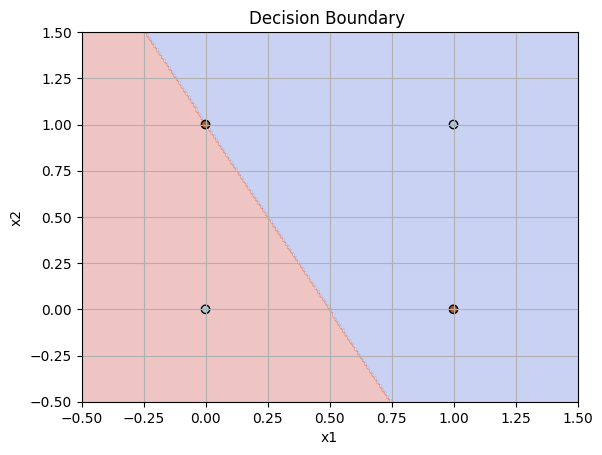

In [30]:
# Plotting
plot_decision_boundary(X, y, model)

1. Creating the Grid for Visualization


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Purpose: Create a grid of points covering the entire range of input features (x1 and x2).
Steps:
Determine the minimum and maximum values for x1 and x2 from the dataset (X).
Add padding (-1 and +1) to ensure the grid extends slightly beyond the dataset points.
Use np.meshgrid to create a grid of points with a step size of 0.01. This creates a dense grid for smooth visualization.

2. Preparing Input for Prediction


grid = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(grid)
Z = Z.reshape(xx.shape)
Purpose: Predict the output class for every point on the grid.
Steps:
Flatten (ravel) the grid into a 2D array (grid) with each row representing a point (x1, x2).
Pass the grid to the Perceptron model's predict() function to classify each point as 0 or 1.
Reshape (Z.reshape) the predictions back into the original grid shape (xx.shape) for plotting.

3. Plotting the Decision Boundary


plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
Purpose: Visualize the decision boundary.
Steps:
Use plt.contourf to plot the decision boundary as a filled contour.
The regions where Z=0 are shaded differently from regions where Z=1.
The alpha=0.3 makes the shading semi-transparent, allowing the scatter points to be visible.

4. Plotting the Data Points

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.Paired)
Purpose: Overlay the actual data points on the plot.
Steps:
X[:, 0] and X[:, 1] are the feature values (x1 and x2).
c=y assigns different colors to points based on their class (0 or 1).
edgecolors="k" adds black edges to the points for better visibility.

5. Final Touches

plt.title("Decision Boundary for AND Function")
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid()
plt.show()
Purpose: Add labels, a title, and grid lines to improve the plot's clarity.
Steps:
xlim and ylim define the range of the plot.
xlabel and ylabel label the axes.
grid() adds grid lines for better readability.
show() displays the final plot.
